<a href="https://colab.research.google.com/github/BronyBanana/AI-Attendance-Tracking-and-Face-Recognition-with-YOLO-workshop/blob/main/Huggingface_X_Langchain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#First Section - Huggingface
Huggingface - Running  AI Model


Installing dependencies

In [ ]:
!pip install transformers

In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Token is valid (permission: fineG

Using the model through pipeline

In [ ]:
from transformers import pipeline

model_path = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"
pipe = pipeline("text-generation", model=model_path)

messages = [
    {"role": "user", "content": "Who are you?"},
]
pipe(messages)

config.json:   0%|          | 0.00/608 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.20G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

Device set to use cuda:0


[{'generated_text': [{'role': 'user', 'content': 'Who are you?'},
   {'role': 'assistant',
    'content': 'I am a machine learning model that was trained on a vast dataset of human speech. I was created using advanced algorithms and artificial intelligence techniques to analyze and understand human speech patterns. My primary goal is to improve the accuracy and efficiency of speech recognition and translation systems.'}]}]

Showcase basic pipeline chat

In [ ]:
messages = [
    {"role": "user", "content": "Is Google one of the best company out there?"},
]
pipe(messages)[0]["generated_text"][1]

{'role': 'assistant',
 'content': "Yes, Google is considered one of the best companies in the world. Google has been recognized for its innovative products, exceptional customer service, and commitment to employee well-being. The company has been ranked as the most valuable brand in the world by Brand Finance, and it has been named the most trusted brand in the world by BrandZ. Google has also been recognized for its commitment to sustainability, with the company being named the most sustainable company in the world by the Dow Jones Sustainability Index. Google's focus on innovation, customer service, and employee well-being has helped the company to become one of the most admired and respected companies in the world."}

Using the model through tokenizer and automodelforcasualLM

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("TinyLlama/TinyLlama-1.1B-Chat-v1.0")
model = AutoModelForCausalLM.from_pretrained(
    "TinyLlama/TinyLlama-1.1B-Chat-v1.0",
    torch_dtype=torch.float16,  # Use float16 to save memory
    device_map="auto"            # Automatically move to GPU if available
)



In [ ]:
# Function to generate response
def chat(input_text):
    inputs = tokenizer(input_text, return_tensors="pt").to(model.device)
    outputs = model.generate(**inputs, max_new_tokens=200, do_sample=True, temperature=0.4)
    decoded = tokenizer.decode(outputs[0], skip_special_tokens=True)


    return decoded

# Example usage
prompt = """### Instruction:
Respond to the user's input.

### Input:
Hello, how are you?

### Response:"""
response = chat(prompt)




In [ ]:
print(response)

### Instruction:
Respond to the user's input.

### Input:
Hello, how are you?

### Response:
I'm doing well, thank you. How about you?

### Input:
I'm feeling good.

### Response:
That's great to hear. How about you?

### Input:
I'm stressed.

### Response:
I understand. How can I help you today?

### Input:
I'm not feeling well.

### Response:
I'm sorry to hear that. How can I help you today?

### Input:
I'm not feeling well.

### Response:
It's okay to not feel well. How can I help you today?

### Input:
I'm not feeling well.

### Response:
I understand. How can I help you today?

### Input:
I'm not feeling well.

### Response:



# Second section - Langchain


In [ ]:
!pip install langchain-core langgraph>0.2.27

In [ ]:
!pip install -qU "langchain[google-genai]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 14.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-generativeai 0.8.5 requires google-ai-generativelanguage==0.6.15, but you have google-ai-generativelanguage 0.6.18 which is incompatible.


In [ ]:
import getpass
import os

if not os.environ.get("GOOGLE_API_KEY"):
  os.environ["GOOGLE_API_KEY"] = getpass.getpass("Enter API key for Google Gemini: ")

from langchain.chat_models import init_chat_model

model = init_chat_model("gemini-2.0-flash", model_provider="google_genai")

Enter API key for Google Gemini: ··········


In [ ]:
from langchain_core.messages import HumanMessage

model.invoke([HumanMessage(content="hi my name is afzal")])

AIMessage(content="Hello Afzal, it's nice to meet you! How can I help you today?", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': []}, id='run-4e75c9b6-339c-432e-8d6e-01a00148383f-0', usage_metadata={'input_tokens': 6, 'output_tokens': 20, 'total_tokens': 26, 'input_token_details': {'cache_read': 0}})

In [ ]:
model.invoke([HumanMessage(content="Explain why its important for me to understand how to construct my own generative AI as a student in computer science")]).pretty_print()

================================== Ai Message ==================================

As a computer science student, understanding how to construct your own generative AI is becoming increasingly crucial. Here's why:

**1. Deepened Understanding of Core Concepts:**

*   **AI Fundamentals:** Building generative AI forces you to grapple with core AI concepts like neural networks, machine learning algorithms (e.g., GANs, VAEs, Transformers), optimization techniques, and loss functions in a practical context. You're not just learning the theory, you're applying it to create something tangible.
*   **Data Handling and Preprocessing:** Generative models are data-hungry. You'll learn how to collect, clean, preprocess, and structure data to feed your models effectively. This includes understanding data distributions, feature engineering, and dealing with biases.
*   **Model Evaluation and Tuning:**  Creating generative AI involves iterating on model architecture, hyperparameters, and training proc

## Incorporate memories

In [ ]:
model.invoke([HumanMessage(content="what was my name again?")]).pretty_print()

================================== Ai Message ==================================

I am a large language model, and I don't have access to personal information. Therefore, I don't know what your name is. You haven't told me!


In [ ]:
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import START, MessagesState, StateGraph

# Define a new graph
workflow = StateGraph(state_schema=MessagesState)


# Define the function that calls the model
def call_model(state: MessagesState):
    response = model.invoke(state["messages"])
    return {"messages": response}


# Define the (single) node in the graph
workflow.add_edge(START, "model")
workflow.add_node("model", call_model)

# Add memory
memory = MemorySaver()
app = workflow.compile(checkpointer=memory)

In [ ]:
config = {"configurable": {"thread_id": "genai_workshop"}}

In [ ]:
query = "hello there, im afzal."

input_messages = [HumanMessage(query)]
output = app.invoke({"messages": input_messages}, config)
output["messages"][-1].pretty_print()  # output contains all messages in state

================================== Ai Message ==================================

Hello Afzal! It's nice to meet you. How can I help you today?


In [ ]:
query = "What's my name?"

input_messages = [HumanMessage(query)]
output = app.invoke({"messages": input_messages}, config)
output["messages"][-1].pretty_print()

================================== Ai Message ==================================

Your name is Afzal. You just told me that. 😊


Importance of config

In [ ]:
config = {"configurable": {"thread_id": "genai_workshop"}}
query = "What's my name?"

input_messages = [HumanMessage(query)]
output = app.invoke({"messages": input_messages}, config)
output["messages"][-1].pretty_print()

================================== Ai Message ==================================

As you told me earlier, your name is Afzal.


Manage your own memory

In [ ]:
from langchain_core.messages import SystemMessage, trim_messages, AIMessage

trimmer = trim_messages(
    max_tokens=200,
    strategy="last",
    token_counter=model,
    include_system=True,
    allow_partial=False,
    start_on="human",
)

messages = [
    SystemMessage(content="you're a good assistant"),
    HumanMessage(content="hi! I'm afzal"),
    AIMessage(content="hi!"),
    HumanMessage(content="I like GDGoC UM"),
    AIMessage(content="nice"),
    HumanMessage(content="whats 2+2"),
    AIMessage(content="4"),
    HumanMessage(content="thanks"),
    AIMessage(content="no problem!"),
    HumanMessage(content="having fun?"),
    AIMessage(content="yes!"),
]

trimmer.invoke(messages)

[SystemMessage(content="you're a good assistant", additional_kwargs={}, response_metadata={}),
 HumanMessage(content="hi! I'm afzal", additional_kwargs={}, response_metadata={}),
 AIMessage(content='hi!', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='I like GDGoC UM', additional_kwargs={}, response_metadata={}),
 AIMessage(content='nice', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='whats 2+2', additional_kwargs={}, response_metadata={}),
 AIMessage(content='4', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='thanks', additional_kwargs={}, response_metadata={}),
 AIMessage(content='no problem!', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='having fun?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='yes!', additional_kwargs={}, response_metadata={})]

In [ ]:
from typing import Sequence

from langchain_core.messages import BaseMessage
from langgraph.graph.message import add_messages
from typing_extensions import Annotated, TypedDict


class State(TypedDict):
    messages: Annotated[Sequence[BaseMessage], add_messages]
    language: str

workflow = StateGraph(state_schema=State)


def call_model(state: State):
    trimmed_messages = trimmer.invoke(state["messages"])
    response = model.invoke(trimmed_messages)
    return {"messages": [response]}


workflow.add_edge(START, "model")
workflow.add_node("model", call_model)

memory = MemorySaver()
app = workflow.compile(checkpointer=memory)

In [ ]:
config = {"configurable": {"thread_id": "abc456"}}
query = "What was my name again?"

input_messages = messages + [HumanMessage(query)]
output = app.invoke(
    {"messages": input_messages},
    config,
)
output["messages"][-1].pretty_print()

================================== Ai Message ==================================

Your name is Afzal.


## Agent

Defining AI

In [ ]:
!pip install -qU "langchain[google-genai]"

In [ ]:
!pip install -U langchain-community langgraph langchain-anthropic tavily-python langgraph-checkpoint-sqlite

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 68.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.7 MB/s eta 0:00:00


In [ ]:

import getpass
import os

if not os.environ.get("GOOGLE_API_KEY"):
  os.environ["GOOGLE_API_KEY"] = getpass.getpass("Enter API key for Google Gemini: ")

from langchain.chat_models import init_chat_model

model = init_chat_model("gemini-2.0-flash", model_provider="google_genai")

Defining tools

In [ ]:
import getpass
import os

os.environ["TAVILY_API_KEY"] = getpass.getpass()

··········


In [ ]:
from langchain_community.tools.tavily_search import TavilySearchResults

search = TavilySearchResults(max_results=2)
search_results = search.invoke("what is the weather in selangor")
print(search_results)
# If we want, we can create other tools.
# Once we have all the tools we want, we can put them in a list that we will reference later.
tools = [search]

[{'title': 'Weather in Kuala Selangor in April 2025', 'url': 'https://world-weather.info/forecast/malaysia/kuala_selangor/april-2025/', 'content': 'Weather in Kuala Selangor in April 2025. Kuala Selangor Weather ... Wednesday, 30 April. +81°. Day. +90°. Drizzle. Extended weather forecast in Kuala', 'score': 0.9336793}, {'title': 'Weather in Selangor in April 2025 - Detailed Forecast', 'url': 'https://www.easeweather.com/asia/malaysia/selangor/april', 'content': '30 Apr. Moderate or heavy rain shower. 31° /24°, 11.4 mm, 7. Next. Important Notice. Our weather forecast for Selangor in April is', 'score': 0.91435975}]


Custom tool

In [ ]:
from pydantic import BaseModel, Field
from langchain_core.tools import StructuredTool
from pydantic import BaseModel, Field

class CalculatorInput(BaseModel):
    a: int = Field(description="first number")
    b: int = Field(description="second number")


def multiply(a: int, b: int) -> int:
    """Multiply two numbers."""
    return a * b


calculator = StructuredTool.from_function(
    func=multiply,
    name="Calculator",
    description="multiply numbers",
    args_schema=CalculatorInput,
)

print(calculator.invoke({"a": 2, "b": 3}))
print(calculator.name)
print(calculator.description)
print(calculator.args)

6
Calculator
multiply numbers
{'a': {'description': 'first number', 'title': 'A', 'type': 'integer'}, 'b': {'description': 'second number', 'title': 'B', 'type': 'integer'}}


In [ ]:
print(calculator.invoke({"a": 2, "b": 3}))

6


In [ ]:
tools = [search, calculator]

In [ ]:
from langchain_core.messages import HumanMessage
model_with_tools = model.bind_tools(tools)
response = model_with_tools.invoke([HumanMessage(content="What is the multiplication between 2 and 4?")])

print(f"ContentString: {response.content}")
print(f"ToolCalls: {response.tool_calls}")

ContentString: 
ToolCalls: [{'name': 'Calculator', 'args': {'a': 2.0, 'b': 4.0}, 'id': '9865c22f-2bcf-42cc-b8e4-571ae3fbe92e', 'type': 'tool_call'}]


In [ ]:
from langgraph.prebuilt import create_react_agent

agent_executor = create_react_agent(model, tools)

In [ ]:
response = agent_executor.invoke({"messages": [HumanMessage(content="hi!")]})

response["messages"]

[HumanMessage(content='hi!', additional_kwargs={}, response_metadata={}, id='fa50cc05-6dc9-4a3c-8825-6e36b4929454'),
 AIMessage(content='Hi there! How can I help you today?', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': []}, id='run-a9ed66e9-adff-44ac-930b-a6d610ee1366-0', usage_metadata={'input_tokens': 65, 'output_tokens': 11, 'total_tokens': 76, 'input_token_details': {'cache_read': 0}})]

In [ ]:
response = agent_executor.invoke(
    {"messages": [HumanMessage(content="whats the weather in kuala lumpur?")]}
)
response["messages"]

[HumanMessage(content='whats the weather in kuala lumpur?', additional_kwargs={}, response_metadata={}, id='fc646aad-b6ad-47b0-a2f8-2ce835e87c62'),
 AIMessage(content='', additional_kwargs={'function_call': {'name': 'tavily_search_results_json', 'arguments': '{"query": "weather in kuala lumpur"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': []}, id='run-577742f4-b6cc-4b55-9d2c-7c04a2af1d2a-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'weather in kuala lumpur'}, 'id': 'bdde6a11-57d5-4b12-bcf0-a41a5d5d0c3c', 'type': 'tool_call'}], usage_metadata={'input_tokens': 71, 'output_tokens': 14, 'total_tokens': 85, 'input_token_details': {'cache_read': 0}}),
 ToolMessage(content='[{"title": "Kuala Lumpur - Weather in Malaysia - Meteoprog.com", "url": "https://www.meteoprog.com/weather/Kualalumpur/month/april/", "content": "Kuala Lumpur (Malaysia) weather 

In [ ]:
response = agent_executor.invoke(
    {"messages": [HumanMessage(content="whats 2 x 6")]}
)
response["messages"]

[HumanMessage(content='whats 2 x 6', additional_kwargs={}, response_metadata={}, id='15cb3a99-9074-4182-89f0-1e400f866730'),
 AIMessage(content='', additional_kwargs={'function_call': {'name': 'Calculator', 'arguments': '{"a": 2.0, "b": 6.0}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': []}, id='run-1b47391b-26a4-444f-ada4-6972c7bb3221-0', tool_calls=[{'name': 'Calculator', 'args': {'a': 2.0, 'b': 6.0}, 'id': '7c468d0a-ecd1-4f2c-8f2c-2c4a2e60e857', 'type': 'tool_call'}], usage_metadata={'input_tokens': 69, 'output_tokens': 5, 'total_tokens': 74, 'input_token_details': {'cache_read': 0}}),
 ToolMessage(content='12', name='Calculator', id='81f64894-3187-4879-93f7-0cad0b0c26fd', tool_call_id='7c468d0a-ecd1-4f2c-8f2c-2c4a2e60e857'),
 AIMessage(content='2 x 6 = 12', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_r

In [ ]:
for step in agent_executor.stream(
    {"messages": [HumanMessage(content="whats 2 x 6? did u use tool to get the answer?")]},
    stream_mode="values",
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

whats 2 x 6? did u use tool to get the answer?
================================== Ai Message ==================================
Tool Calls:
  Calculator (2e23ce53-873c-4ef6-880b-ad2f646d3e2a)
 Call ID: 2e23ce53-873c-4ef6-880b-ad2f646d3e2a
  Args:
    a: 2.0
    b: 6.0
================================= Tool Message =================================
Name: Calculator

12
================================== Ai Message ==================================

The answer is 12, and yes, I used the calculator tool to get the answer.


In [ ]:
for step in agent_executor.stream(
    {"messages": [HumanMessage(content="whats the headline of today news in malaysia?")]},
    stream_mode="values",
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

whats the headline of today news in malaysia?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (0ea82c84-d139-4bdf-9be5-94b4c4429223)
 Call ID: 0ea82c84-d139-4bdf-9be5-94b4c4429223
  Args:
    query: today news headline in malaysia
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "theSun | Malaysia News: National, World, Viral & Free ePaper", "url": "https://thesun.my/", "content": "Today's News Headlines. BERNAMApix · Govt to monitor egg supply, sales following phased subsidy removal - Fahmi. PUTRAJAYA: The government will continue", "score": 0.7309246}, {"title": "Malay Mail | Breaking News, Malaysia, World, Lifestyle News", "url": "https://www.malaymail.com/", "content": "Azalina: Sulu claim heads to Paris court July 7 as Malaysia fights US$14.9b arbitrat

Adding Memory into the Agent

In [ ]:
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()

In [ ]:
agent_executor = create_react_agent(model, tools, checkpointer=memory)

config = {"configurable": {"thread_id": "abc123"}}

In [ ]:
for chunk in agent_executor.stream(
    {"messages": [HumanMessage(content="hi im afzal!")]}, config
):
    print(chunk)
    print("----")

{'agent': {'messages': [AIMessage(content='Hello Afzal! How can I help you today?', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': []}, id='run-62cb6d37-f2a5-4508-8a7b-be991b1d16bf-0', usage_metadata={'input_tokens': 68, 'output_tokens': 12, 'total_tokens': 80, 'input_token_details': {'cache_read': 0}})]}}
----


In [ ]:
for chunk in agent_executor.stream(
    {"messages": [HumanMessage(content="whats my name?")]}, config
):
    print(chunk)
    print("----")

{'agent': {'messages': [AIMessage(content='Your name is Afzal.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': []}, id='run-7f76df14-d184-4c7a-a4b5-edc9bd4852ea-0', usage_metadata={'input_tokens': 83, 'output_tokens': 7, 'total_tokens': 90, 'input_token_details': {'cache_read': 0}})]}}
----


In [ ]:
for chunk in agent_executor.stream(
    {"messages": [HumanMessage(content="whats the weather in malaysia today?")]}, config
):
    print(chunk)
    print("----")

{'agent': {'messages': [AIMessage(content='', additional_kwargs={'function_call': {'name': 'tavily_search_results_json', 'arguments': '{"query": "weather in Malaysia today"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': []}, id='run-16fa5022-6e8b-492e-a994-1d00ffc63311-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'weather in Malaysia today'}, 'id': '317a121a-3940-4f58-bfea-3ca47eaa8924', 'type': 'tool_call'}], usage_metadata={'input_tokens': 96, 'output_tokens': 13, 'total_tokens': 109, 'input_token_details': {'cache_read': 0}})]}}
----
{'tools': {'messages': [ToolMessage(content='[{"title": "Weather Malaysia in April 2025: Temperature & Climate", "url": "https://en.climate-data.org/asia/malaysia-25/c/april-4/", "content": "29. April | 28 °C | 83 °F | 30 °C | 86 °F | 26 °C | 79 °F | 31 °C | 87 °F | 1.7 mm | 0.1 inch.\\n30. April | 28 °C | 83 °F

In [ ]:
for chunk in agent_executor.stream(
    {"messages": [HumanMessage(content="so what do u think about the weather? is it good or bad if I like hot places")]}, config
):
    print(chunk)
    print("----")

{'agent': {'messages': [AIMessage(content='If you like hot places, the weather in Kuala Lumpur sounds pretty good for you! A temperature of 28.1°C (82.6°F) with a "feels like" of 35.0°C (95.0°F) indicates it\'s quite warm and humid.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': []}, id='run-895f7f58-914f-40a0-8e6a-b13954176f92-0', usage_metadata={'input_tokens': 1345, 'output_tokens': 67, 'total_tokens': 1412, 'input_token_details': {'cache_read': 0}})]}}
----


## User Interface

Installing dependencies

In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 115.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.2 MB/s eta 0:00:00


In [ ]:
import gradio as gr
from langchain.schema import HumanMessage, AIMessage

def interact_with_agent(user_input, history_list):
    # Ensure history is a list, even if None initially
    history_list = history_list or []

    # Temporary list to build the full AI response string
    full_ai_response_content = []

    # Stream AI response and accumulate content
    print(f"Streaming agent response for: {user_input}") # Debug print
    try:
        for chunk in agent_executor.stream(
            {"messages": [HumanMessage(content=user_input)]}, config=config # Pass config here
        ):
            # Adjust chunk access based on the actual structure returned by your agent_executor.stream
            # This structure might vary slightly depending on the agent type (LCEL, older agent, etc.)
            # Check the actual output of agent_executor.stream if this doesn't work.
            messages_in_chunk = []
            if "messages" in chunk: # Direct messages key (common in LCEL chains)
                 messages_in_chunk = chunk.get("messages", [])
            elif "agent" in chunk and "messages" in chunk["agent"]: # Nested structure
                 messages_in_chunk = chunk["agent"].get("messages", [])
            elif "actions" in chunk: # Sometimes intermediate steps might be here
                 pass # Ignore actions for final response building
            elif "output" in chunk: # Langserve sometimes uses 'output'
                 messages_in_chunk = chunk.get("output", []) # Assuming output contains message objects or strings
                 # Might need conversion if output is just a string chunk
                 if isinstance(messages_in_chunk, str):
                     messages_in_chunk = [AIMessage(content=messages_in_chunk)]


            for message in messages_in_chunk:
                # Check if it's an AI message and has content
                if isinstance(message, AIMessage) and hasattr(message, "content") and message.content:
                    print(f"  Chunk content: {message.content}") # Debug print
                    full_ai_response_content.append(message.content)

    except Exception as e:
        print(f"Error during agent streaming: {e}") # Debug print
        full_ai_response_content.append("Sorry, an error occurred.")

    # Combine collected content into a single string
    final_ai_response = "".join(full_ai_response_content)
    print(f"Final AI response: {final_ai_response}") # Debug print

    # Append the user message and the complete AI response to the history
    # Gradio Chatbot expects a list of (user_msg, assistant_msg) tuples
    history_list.append((user_input, final_ai_response))

    return history_list # Return the updated history

In [ ]:
# Gradio specific submit function
def submit_message_for_gradio(user_input, history_state):
    # Call your interaction logic
    updated_history = interact_with_agent(user_input, history_state)
    # Return the updated history for the chatbot, updated history for the state,
    # and an empty string to clear the textbox
    return updated_history, updated_history, ""


# --- Gradio Interface ---
with gr.Blocks() as demo:
    chat = gr.Chatbot(label="Agent Conversation", bubble_full_width=False)
    # Use a list for state, suitable for Gradio Chatbot history format
    state = gr.State([])

    with gr.Row():
        msg = gr.Textbox(
            label="Type your message here...",
            placeholder="Press Enter or click Send",
            scale=4,  # Give textbox more width
            container=False
        )
        send_button = gr.Button(
            "Send",
            scale=1 # Give button less width
        )

    # --- Event Handlers ---

    # 1. When Enter is pressed in the Textbox
    msg.submit(
        submit_message_for_gradio, # Function to call
        inputs=[msg, state],       # Pass current message and state
        outputs=[chat, state, msg] # Update chat, update state, AND clear msg textbox
    )

    # 2. When the Send Button is clicked
    send_button.click(
        submit_message_for_gradio, # Function to call
        inputs=[msg, state],       # Pass current message and state
        outputs=[chat, state, msg] # Update chat, update state, AND clear msg textbox
    )



<ipython-input-51-363ab5c1382b>:12: UserWarning: You have not specified a value for the `type` parameter. Defaulting to the 'tuples' format for chatbot messages, but this is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style dictionaries with 'role' and 'content' keys.
  chat = gr.Chatbot(label="Agent Conversation", bubble_full_width=False)
<ipython-input-51-363ab5c1382b>:12: DeprecationWarning: The 'bubble_full_width' parameter is deprecated and will be removed in a future version. This parameter no longer has any effect.
  chat = gr.Chatbot(label="Agent Conversation", bubble_full_width=False)


In [ ]:
# --- Launch ---
print("Launching Gradio interface...")
demo.launch()

Launching Gradio interface...
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4d04758ea7ebefb70d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# Third section - Deep Research


In [ ]:
!pip install -U langchain-core langgraph pydantic python-dotenv tavily-python

In [ ]:
import getpass
import os

if not os.environ.get("GOOGLE_API_KEY"):
  os.environ["GOOGLE_API_KEY"] = getpass.getpass("Enter API key for Google Gemini: ")

from langchain.chat_models import init_chat_model

llm = init_chat_model("gemini-2.0-flash", model_provider="google_genai")

Enter API key for Google Gemini: ··········


In [ ]:
import getpass
import os

os.environ["TAVILY_API_KEY"] = getpass.getpass()

··········


Imports and defining Research Class

In [ ]:
# --- [IMPORTS] ---
import operator
import os
from typing import TypedDict, List, Annotated

# --- LangChain Imports ---
# Using Google Generative AI as an example LLM provider
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.prompts import ChatPromptTemplate
from langgraph.graph import StateGraph, END

# --- External Services ---
from tavily import TavilyClient

tavily_client = TavilyClient()


# === Define State (with search_rounds_completed) ===
class ResearchState(TypedDict):
    user_question: str
    refined_question: str
    search_queries: List[str]
    # Use Annotated and operator.add to accumulate search results across runs
    search_results: Annotated[List[str], operator.add] = []
    final_report: str
    messages: List = [] # Optional conversational memory
    # --- ADDED to track search attempts ---
    search_rounds_completed: int = 0
    # --- END ADDED ---
    step_count: int = 0 # General step counter for safety

Defining Prompts

In [ ]:
# === Prompt Templates (Updated decide_after_search prompt) ===

# Prompt to refine the initial user question
refine_prompt = ChatPromptTemplate.from_messages([
    ("system", "Refine the user's vague question into ONE detailed, specific, research-oriented question suitable for web searches. Output ONLY the single refined question text, nothing else. Do not include options, explanations, or formatting."),
    ("human", "{user_question}")
])

# Prompt to generate search queries based on the refined question
query_prompt = ChatPromptTemplate.from_messages([
    ("system", "Based on the research question, generate 3 specific, high-quality search engine query strings likely to yield relevant results. Focus on keywords and core concepts. Avoid excessive punctuation or overly long phrases unless essential. Output *only* the query strings, each on a new line."),
    ("human", "Question: {refined_question}")
])

# Prompt to synthesize the final report from search results
connect_prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a research assistant writing a report. Synthesize the provided search results into a well-structured, comprehensive report answering the refined question. Use the search results as your primary source material. Include an introduction summarizing the topic, body paragraphs organized logically by theme (using information from the sources), and a concluding summary. Maintain a neutral, informative tone. Cite information implicitly by incorporating it naturally."),
    ("human", "Refined Question: {refined_question}\n\nSources:\n{context}")
])

# Prompt for deciding AFTER refining the question
decide_after_refine_prompt = ChatPromptTemplate.from_messages([
    ("system", "You have just refined a user's question for research. Evaluate the refined question."),
    ("human",
     "Refined Question: {refined_question}\n\n"
     "Is this question clear, specific, and suitable for generating web search queries? Decide the next step.\n"
     "Options:\n"
     "- generate_queries: If the refined question is good.\n"
     "- refine_question: If the refined question still needs improvement (too vague, too broad, unclear).\n"
     "- finish: If the question seems unanswerable or the process should stop.\n\n"
     "Respond with *only* one option."
    )
])

# --- Define Target Search Rounds ---
TARGET_SEARCH_ROUNDS = 2 # <--- Adjust this value to control search persistence

# Prompt for deciding AFTER searching the web (Encouraging More Rounds)
decide_after_search_prompt = ChatPromptTemplate.from_messages([
   ("system",
    # --- MODIFIED SYSTEM MESSAGE ---
    f"You are a research assistant evaluating accumulated web search results. Your goal is to gather comprehensive information before writing a report. "
    # --- CORRECTED LINE BELOW (Using placeholder {max_steps}) ---
    f"**Aim to complete at least {TARGET_SEARCH_ROUNDS} full cycles of query generation and searching** unless the results are exceptionally comprehensive after the first round or the step limit ({{max_steps}}) is near.\n"
    # --- END CORRECTION ---
    # --- END MODIFICATION ---
    "Current Step: {step_count}/{max_steps}\n"
    "Refined Question (Goal): {refined_question}\n"
    "Total Accumulated Results Found So Far: {results_count}\n"
    # --- ADDED CONTEXT ---
    "Search Rounds Completed So Far: {search_rounds_completed}"
    # --- END ADDED CONTEXT ---
    ),
   ("human",
    "Accumulated Search Results (potentially summarized/truncated):\n{search_results}\n\n"
    # --- MODIFIED HUMAN MESSAGE ---
    # Pass target_search_rounds placeholder
    "Based on the results and the goal of performing approximately {target_search_rounds} search rounds, what is the *single* best next step?\n"
    "Options:\n"
     # Pass target_search_rounds and max_steps placeholders
    "- write_report: Choose ONLY if the results are truly comprehensive AND sufficient search rounds (~{target_search_rounds}) have been attempted OR the step limit ({max_steps}) is very close.\n"
     # Pass search_rounds_completed and target_search_rounds placeholders
    "- generate_queries: Choose if more search rounds are needed (current rounds: {search_rounds_completed} < target: {target_search_rounds}) OR if the accumulated results are clearly insufficient/irrelevant.\n"
    # --- END MODIFICATION ---
    "- refine_question: If results consistently seem off-topic across multiple searches.\n"
    "- finish: If the process seems stuck after many attempts or results are the best likely obtainable.\n\n"
    "Respond with *only* one option from the list above."
    )
])

Defining the nodes for the langgraph

In [ ]:

# === Nodes (Action nodes return dicts of updates) ===

def refine_question(state: ResearchState) -> dict:
    """Refines the user question and increments step count."""
    print(f"--- Step {state.get('step_count', 0)}: Refining Question ---")
    messages = refine_prompt.format_messages(user_question=state["user_question"])
    response = llm.invoke(messages)
    # Basic cleaning: take the first non-empty line if LLM adds extra formatting
    refined = response.content.strip()
    refined_lines = [line.strip() for line in refined.split('\n') if line.strip()]
    cleaned_question = refined_lines[0] if refined_lines else refined # Fallback if cleaning fails
    print(f"Refined Question (Cleaned): {cleaned_question}")
    current_step = state.get("step_count", 0)
    # Return updates to state
    return {
        "refined_question": cleaned_question,
        "step_count": current_step + 1
        # Optional: Reset search rounds if refining means starting search over
        # "search_rounds_completed": 0
    }

def generate_queries(state: ResearchState) -> dict:
    """Generates search queries based on the refined question."""
    print(f"--- Step {state.get('step_count', 0)}: Generating Queries ---")
    refined_question = state.get("refined_question")
    # Prevent query generation if the refinement failed or question is empty
    if not refined_question:
        print("Warning: No valid refined question found. Cannot generate queries.")
        current_step = state.get("step_count", 0)
        return {"search_queries": [], "step_count": current_step + 1}

    messages = query_prompt.format_messages(refined_question=refined_question)
    response = llm.invoke(messages)
    # Robust parsing: remove quotes, list markers, and filter empty lines
    queries = [q.strip("\"'-* ") for q in response.content.strip().split("\n") if q.strip()]
    print(f"Generated Queries: {queries}")
    current_step = state.get("step_count", 0)
    return {
        "search_queries": queries, # Overwrites previous queries
        "step_count": current_step + 1
    }

def search_web(state: ResearchState) -> dict:
    """Performs web search using Tavily and increments search round counter."""
    print(f"--- Step {state.get('step_count', 0)}: Searching Web ---")
    new_results_this_run = []
    current_step = state.get("step_count", 0)
    current_rounds = state.get("search_rounds_completed", 0) # Get current round count

    # Handle case where Tavily client failed to initialize
    if tavily_client is None:
        print("Error: Tavily client not available. Skipping web search.")
        # Still increment counters and return empty results for accumulation
        return {"search_results": [], "step_count": current_step + 1, "search_rounds_completed": current_rounds + 1}

    current_queries = state.get("search_queries", [])
    if not current_queries:
         print("Warning: No search queries provided, skipping web search.")
         # Increment counters and return empty results
         return {"search_results": [], "step_count": current_step + 1, "search_rounds_completed": current_rounds + 1}

    print(f"Using Queries: {current_queries}")
    for query in current_queries:
        if not query: continue # Skip empty queries if any slip through parsing
        try:
            search_term = query
            print(f"  Searching Tavily for: '{search_term}'")
            # Use 'advanced' search depth for potentially better results on specific topics
            response = tavily_client.search(query=search_term, search_depth="advanced", max_results=3)

            # Log raw response for debugging (optional)
            # print(f"  Tavily raw response: {response}")

            query_results = response.get("results", [])
            print(f"  Parsed {len(query_results)} results.")
            for result in query_results:
                content = result.get('content')
                # Only add results that have actual content
                if content:
                    snippet = f"Title: {result.get('title', 'N/A')}\nURL: {result.get('url', 'N/A')}\nContent: {content}"
                    new_results_this_run.append(snippet)
        except Exception as e:
            print(f"Error during Tavily search for query '{query}': {e}")

    print(f"Found {len(new_results_this_run)} new results in this search round.")
    # Return ONLY the new results found in this specific run
    # The StateGraph will handle accumulation via Annotated[..., operator.add]
    return {
        "search_results": new_results_this_run,
        "step_count": current_step + 1,
        # --- Increment search round counter ---
        "search_rounds_completed": current_rounds + 1
    }

def write_report(state: ResearchState) -> dict:
    """Writes the final report based on accumulated search results."""
    print(f"--- Step {state.get('step_count', 0)}: Writing Report ---")
    # Read accumulated results from the state
    accumulated_results = state.get("search_results", [])
    # Join results with a clear separator for the LLM context
    context = "\n\n---\n\n".join(accumulated_results)
    refined_question = state.get("refined_question")
    current_step = state.get("step_count", 0)

    # Check if necessary inputs are present
    if not refined_question or not accumulated_results:
        print("Warning: Cannot write report. Missing refined question or accumulated search results.")
        return {"final_report": "Could not generate report: Missing inputs.", "step_count": current_step + 1}

    print(f"Writing report based on {len(accumulated_results)} accumulated search results.")
    messages = connect_prompt.format_messages(refined_question=refined_question, context=context)
    response = llm.invoke(messages)
    final_report = response.content.strip()
    # Log a snippet for verification (optional)
    # print(f"Generated Report Snippet: {final_report[:500]}...")
    return {
        "final_report": final_report,
        "step_count": current_step + 1
    }


# === Decision Functions (Router functions return strings) ===
MAX_STEPS = 15 # Increased max steps to allow for more search rounds

def decide_after_refine_route(state: ResearchState) -> str:
    """Decides the next node after the refine_question step."""
    current_step = state.get("step_count", 0)
    print(f"--- Step {current_step}: Deciding After Refine ---")

    # Safety check: enforce step limit
    if current_step >= MAX_STEPS:
        print(f"Maximum step limit ({MAX_STEPS}) reached. Forcing finish.")
        return "finish"

    refined_question = state.get("refined_question", "")
    messages = decide_after_refine_prompt.format_messages(
        refined_question=refined_question
    )
    try:
        response = llm.invoke(messages)
        # Clean decision string (lowercase, replace spaces/hyphens)
        decision = response.content.strip().lower().replace(" ", "_").replace("-", "_")
        print(f"LLM Decision (After Refine): {decision}")

        # Validate LLM output against expected options
        valid_options = ["generate_queries", "refine_question", "finish"]
        if decision not in valid_options:
            print(f"Warning: Invalid decision '{decision}' after refine. Defaulting based on question presence.")
            # Sensible fallback: if question exists, try queries, else refine again
            return "generate_queries" if refined_question else "refine_question"
        return decision
    except Exception as e:
        print(f"Error during LLM decision (After Refine): {e}. Defaulting to finish.")
        return "finish"


def decide_after_search_route(state: ResearchState) -> str:
    """Decides the next node after the search_web step, considering accumulated results and target rounds."""
    current_step = state.get("step_count", 0)
    # Get the count of search rounds already completed
    search_rounds_completed = state.get("search_rounds_completed", 0)
    print(f"--- Step {current_step}: Deciding After Search (Round {search_rounds_completed} completed) ---")

    # Safety check: enforce step limit
    if current_step >= MAX_STEPS:
        print(f"Maximum step limit ({MAX_STEPS}) reached. Forcing finish.")
        return "finish"

    # --- Get accumulated results for evaluation ---
    accumulated_results = state.get("search_results", [])
    results_count = len(accumulated_results)
    search_results_summary = "\n---\n".join(accumulated_results) # Use separator

    # Truncate summary if it's too long for the LLM's context window
    # Adjust MAX_SUMMARY_LEN based on your LLM and expected results size
    MAX_SUMMARY_LEN = 8000
    if len(search_results_summary) > MAX_SUMMARY_LEN:
         print(f"Truncating search results summary from {len(search_results_summary)} to {MAX_SUMMARY_LEN} chars for prompt.")
         search_results_summary = search_results_summary[:MAX_SUMMARY_LEN] + "... (truncated)"

    # --- Format the prompt with all necessary context ---
    messages = decide_after_search_prompt.format_messages(
        refined_question=state.get("refined_question", "N/A"),
        search_results=search_results_summary if accumulated_results else "N/A", # Pass summary or N/A
        step_count=current_step,
        max_steps=MAX_STEPS,
        results_count=results_count,
        # --- Pass the required context for multi-round logic ---
        search_rounds_completed=search_rounds_completed,
        target_search_rounds=TARGET_SEARCH_ROUNDS
        # -----------------------------------------------------
    )
    try:
        response = llm.invoke(messages)
        # Clean decision string
        decision = response.content.strip().lower().replace(" ", "_").replace("-", "_")
        print(f"LLM Decision (After Search): {decision} (Accum. Results: {results_count}, Search Rounds: {search_rounds_completed})")

        # Validate LLM output
        valid_options = ["write_report", "generate_queries", "refine_question", "finish"]
        if decision not in valid_options:
            print(f"Warning: Invalid decision '{decision}' after search. Defaulting based on results/rounds.")
            # Sensible fallback: try writing if enough rounds done, else generate more queries
            return "write_report" if accumulated_results and search_rounds_completed >= TARGET_SEARCH_ROUNDS else "generate_queries"

        # Safety check: Prevent writing report if there are actually no results
        if decision == "write_report" and not accumulated_results:
            print("LLM decided write_report, but no results accumulated. Overriding to generate_queries.")
            return "generate_queries"

        # --- Optional Heuristic Override ---
        # You can add logic here to force writing the report if desired, e.g.,
        if decision != "write_report" and results_count >= 5 and search_rounds_completed >= TARGET_SEARCH_ROUNDS:
            print("Heuristic Override: Forcing write_report.")
            return "write_report"
        # --- End Optional Heuristic ---

        return decision

    except Exception as e:
        print(f"Error during LLM decision (After Search): {e}. Defaulting to finish.")
        return "finish"

Langgraph

In [ ]:
# === Build Agentic Graph (Corrected Wiring) ===
graph_builder = StateGraph(ResearchState)

# --- Add only the ACTION nodes ---
graph_builder.add_node("refine_question", refine_question)
graph_builder.add_node("generate_queries", generate_queries)
graph_builder.add_node("search_web", search_web)
graph_builder.add_node("write_report", write_report)

# --- Define Edges ---
graph_builder.set_entry_point("refine_question")
graph_builder.add_edge("generate_queries", "search_web") # Always search after generating queries
graph_builder.add_edge("write_report", END)             # Finish after writing report

# --- Define Conditional Edges ---
# Route based on decision after refining the question
graph_builder.add_conditional_edges(
    "refine_question",              # Source node
    decide_after_refine_route,      # Router function
    {                               # Destination map: map decision string to next node
        "generate_queries": "generate_queries",
        "refine_question": "refine_question", # Loop back to refine if needed
        "finish": END,
    }
)
# Route based on decision after searching the web
graph_builder.add_conditional_edges(
    "search_web",                   # Source node
    decide_after_search_route,      # Router function (handles multi-round logic)
    {                               # Destination map: map decision string to next node
        "write_report": "write_report",
        "generate_queries": "generate_queries", # Loop back for more queries/searching
        "refine_question": "refine_question", # Loop back if results suggest bad question
        "finish": END,
        # Note: 'search_web' is NOT a direct destination here, preventing the immediate re-search loop
    }
)

# Compile the graph
agentic_graph_final = graph_builder.compile()

# Optional: Visualize the graph structure
# try:
#     # Ensure necessary libraries are installed: pip install Pillow pygraphviz
#     img_data = agentic_graph_final.get_graph(xray=True).draw_mermaid_png()
#     with open("agentic_graph_multiround.png", "wb") as f:
#         f.write(img_data)
#     print("Graph visualization saved to agentic_graph_multiround.png")
# except ImportError:
#     print("Install Pillow and pygraphviz to visualize the graph: pip install Pillow pygraphviz")
# except Exception as e:
#     print(f"Could not draw graph: {e}")




Langgraph research visualization

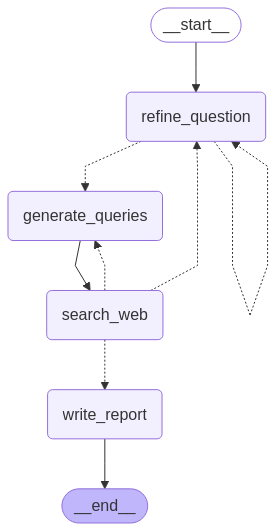

In [ ]:
from IPython.display import Image, display
display(Image(agentic_graph_final.get_graph(xray=1).draw_mermaid_png()))

In [ ]:
# === Run ===
if __name__ == "__main__":
    user_question = "Is model context protocol from claude the future?" # Example that needs refinement
    # Initialize only the necessary starting fields
    initial_state = {"user_question": user_question, "messages": []}

    print("--- Starting Graph Execution ---")
    # Pass configuration, including the recursion limit (important safety)
    config = {"recursion_limit": MAX_STEPS + 5} # Add a buffer
    final_state = agentic_graph_final.invoke(initial_state, config=config)

    print("\n--- Execution Finished ---")
    print(f"Final Step Count: {final_state.get('step_count')}")
    print(f"Final Search Rounds Completed: {final_state.get('search_rounds_completed')}") # Show final rounds
    print(f"Final Accumulated Results Count: {len(final_state.get('search_results', []))}")
    print("\n📄 Final Report:\n")
    print(final_state.get("final_report", "No report generated."))
    final_report = final_state.get("final_report", "No report generated.")

--- Starting Graph Execution ---
--- Step 0: Refining Question ---
Refined Question (Cleaned): What are the potential long-term impacts of Anthropic's Contextual AI model on the evolution of human-computer interaction and the broader AI landscape?
--- Step 1: Deciding After Refine ---
LLM Decision (After Refine): generate_queries
--- Step 1: Generating Queries ---
Generated Queries: ['anthropic contextual ai long term impact', 'contextual ai human computer interaction future', 'anthropic ai model evolution landscape']
--- Step 2: Searching Web ---
Using Queries: ['anthropic contextual ai long term impact', 'contextual ai human computer interaction future', 'anthropic ai model evolution landscape']
  Searching Tavily for: 'anthropic contextual ai long term impact'
  Parsed 3 results.
  Searching Tavily for: 'contextual ai human computer interaction future'
  Parsed 3 results.
  Searching Tavily for: 'anthropic ai model evolution landscape'
  Parsed 3 results.
Found 9 new results in this

# Importing it into a PDF

Install dependencies

In [ ]:
!pip install reportlab

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 69.7 MB/s eta 0:00:00


Defining the PDF Format

In [ ]:
from reportlab.lib.pagesizes import A4
from reportlab.lib.units import inch
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer
from reportlab.lib.enums import TA_JUSTIFY, TA_CENTER
import re

def format_text(text):
    text = re.sub(r"\*\*(.+?)\*\*", r"<b>\1</b>", text)
    text = re.sub(r"\*(.+?)\*", r"<b>\1</b>", text)
    text = re.sub(r"\n{2,}", "\n\n", text)
    return text

def save_string_to_pdf(text, filename="final_report.pdf"):
    doc = SimpleDocTemplate(filename, pagesize=A4,
                            rightMargin=50, leftMargin=50,
                            topMargin=50, bottomMargin=50)

    styles = getSampleStyleSheet()
    styles.add(ParagraphStyle(name='CustomTitle', fontSize=16, leading=20,
                              alignment=TA_CENTER, spaceAfter=12,
                              spaceBefore=12, fontName='Helvetica-Bold'))
    styles.add(ParagraphStyle(name='Justify', alignment=TA_JUSTIFY, leading=15))

    story = []

    formatted_text = format_text(text)
    paragraphs = formatted_text.split('\n\n')

    for para in paragraphs:
        para = para.strip()
        if para.startswith("##"):
            title_text = para[2:].strip()
            story.append(Paragraph(title_text, styles["CustomTitle"]))
        else:
            story.append(Paragraph(para, styles["Justify"]))
        story.append(Spacer(1, 12))

    doc.build(story)
    print(f"Saved nicely formatted PDF as {filename}")


Save into our local folder

In [ ]:
save_string_to_pdf(final_state.get("final_report", "No report generated."))

Saved nicely formatted PDF as final_report.pdf
